# 6.4: Supervised Machine Learning: Regression
This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define the CSV file path
path = r'C:\Users\juank\Documents\World Hapinnes'

In [4]:
# Import file CSV
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2019_cleaned.csv'), index_col=False)

# 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Overall rank', 'Country', 'Region ', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom ', 'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [6]:
df.head(10)

,Unnamed: 0,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,5,6,Switzerland,Western Europe,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,6,7,Sweden,Western Europe,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,7,8,New Zealand,Australia and New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,8,9,Canada,North America,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,9,10,Austria,Western Europe,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [7]:
df.shape

(156, 11)

# Check Missing values

In [8]:
# Check for missing values
df.isnull().sum()
# No missing values to handle

Unnamed: 0                   0
Overall rank                 0
Country                      0
Region                       0
Score                        0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64

# Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(156,)

# Extreme values checks

C:\Users\juank\AppData\Local\Temp\ipykernel_10228\3121644600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'], bins=25) # Shows extreme values
C:\Users\juank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Score', ylabel='Density'>

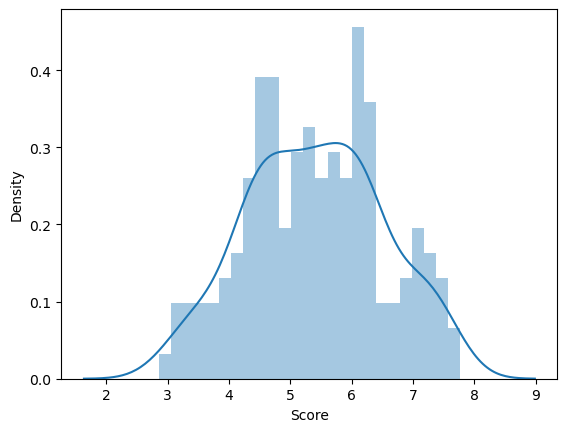

In [11]:
sns.distplot(df['Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['Score'].mean() # Check the mean

5.407096153846155

In [13]:
df['Score'].median() # Check the median

5.3795

In [14]:
df['Score'].max() # Check the max

7.769

# La calificación de 7.769 no es un outlier

# 3. Data prep for regression analysis

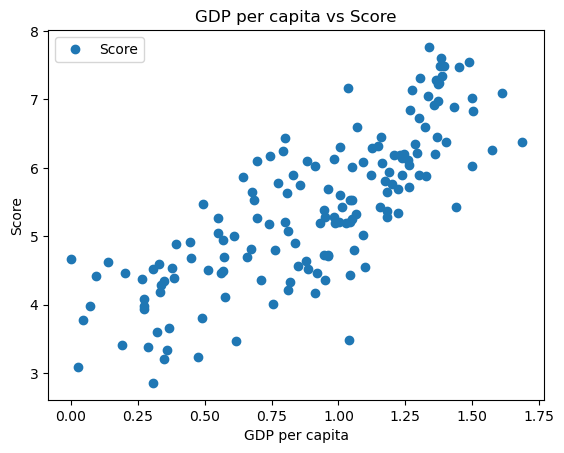

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP per capita', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per capita vs Score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Score')  
plt.show()

# Hypothesis: There is a significant positive relationship between a country's GDP per capita and its happiness score. That is, as GDP per capita increases, the happiness score also increases.

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['GDP per capita'].values.reshape(-1,1)

In [17]:
X

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [18]:
y = df['Score'].values.reshape(-1,1)

In [20]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [21]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [22]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

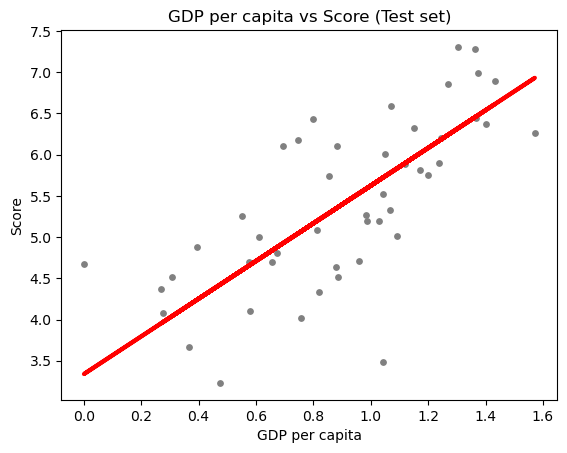

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Score')
plot_test.show()

# The scatter plot and the regression line indicate a positive relationship between GDP per capita and the happiness score. The regression line seems to fit well with the general trend of the data, suggesting that as GDP per capita increases, the happiness score also tends to increase.

In [26]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28560657]]
Mean squared error:  0.5168179896793245
R2 score:  0.49218256470476307


In [ ]:
# The R² score (0.4922) on the test set suggests that the model explains about half of the variance in the happiness scores, which is a decent but not 
excellent fit. It means that there is substantial room for improvement.

#The MSE (0.5168) gives a concrete measure of prediction error on the test data. While this value isn't excessively high, it indicates that the model's
predictions are not perfectly accurate and that there are discrepancies.
suggests the need to consider other factors that may influence the Score.

In [28]:
y_predicted

array([[5.16746232],
       [6.16627239],
       [6.18684285],
       [5.34802524],
       [6.46568686],
       [6.31712243],
       [5.35488206],
       [5.53315938],
       [4.66005767],
       [5.04175396],
       [5.59487075],
       [5.73886397],
       [4.65091524],
       [4.04294389],
       [5.89885643],
       [5.71829351],
       [6.9319506 ],
       [5.36402449],
       [4.92518803],
       [3.95151963],
       [4.17550907],
       [6.45883004],
       [5.06461003],
       [6.01999357],
       [3.33897707],
       [4.4269258 ],
       [4.59834629],
       [5.29317069],
       [5.58572833],
       [5.19717521],
       [6.47711489],
       [6.23941181],
       [5.21317446],
       [4.73548268],
       [5.7845761 ],
       [5.77771928],
       [4.23722045],
       [4.87719029],
       [5.69086623],
       [6.54568309],
       [4.84062058],
       [3.96751888],
       [5.83485944],
       [6.61425128],
       [6.08399056],
       [5.96513902],
       [5.72515033]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.436,5.167462
1,5.893,6.166272
2,6.198,6.186843
3,4.639,5.348025
4,6.446,6.465687
5,7.307,6.317122
6,6.100,5.354882
7,4.707,5.533159
8,4.107,4.660058
9,6.174,5.041754


# Compare how the regression fits the training set

In [30]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28560657]]
Mean squared error:  0.42965385241536524
R2 score:  0.6752547237794557


# The model shows a better fit to the training data, with an R² score of 0.6753, indicating that approximately 68% of the variability in the Score is explained by GDP per capita in this set. The MSE of 0.4297 is lower than in the test set, suggesting that predictions are more accurate on the training data. This better performance on the training set is typical and may suggest that the model is slightly overfitted to these data.

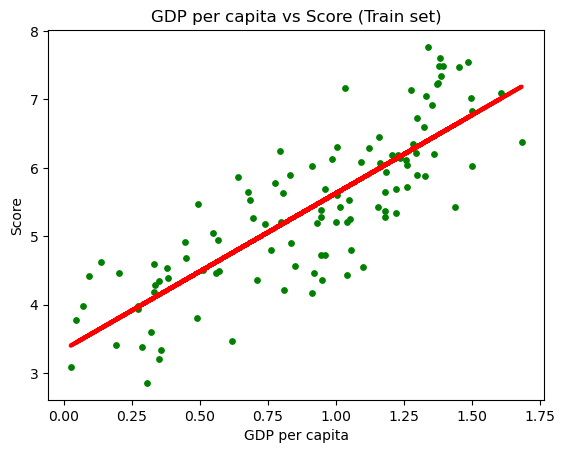

In [33]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Score')
plot_test.show()

# Overall, the linear regression model shows a positive relationship between GDP per capita and Score, but its predictive ability is moderate. The performance difference between the training and test sets suggests the model may be slightly overfitted to the training data.It's important to remember at this point that the World Happiness Report is based on data from 156 countries, which is a relatively small number for a regression model. 

# The model only considers GDP per capita, but other factors can also influence the Score. Omitting important variables can lead to a biased model with suboptimal performance.